In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

In [2]:
# Download cleaned data and skip to EDA
# comment out any datasets you don't wish to import
df = pd.read_csv("../Data/clean_df_main.csv")
df_others = pd.read_csv("../Data/clean_df_others.csv")
df_engineering = pd.read_csv("../Data/clean_df_engineering.csv")
df_business = pd.read_csv("../Data/clean_df_business.csv")
df_medical = pd.read_csv("../Data/clean_df_medical.csv")
df_law = pd.read_csv("../Data/clean_df_law.csv")
df_compsci = pd.read_csv("../Data/clean_df_compsci.csv")

# Loading and Preprocessing Dataset

In [3]:
dataPath = "../Data/students_mental_health_survey.csv"
df = pd.read_csv(dataPath)

In [4]:
""" Dataset Description """
dataset_shape = df.shape
dataset_info = df.info
missing_vals = df.isnull().sum()
print(f"Dataset Shape: {dataset_shape}\nData Types and Column Info: \n{dataset_info}\nMissing Values: {missing_vals}")

# unique values for each column:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Dataset Shape: (7022, 20)
Data Types and Column Info: 
<bound method DataFrame.info of       Age            Course  Gender  CGPA  Stress_Level  Depression_Score  \
0      25            Others    Male  3.56             3                 3   
1      24       Engineering  Female  2.44             0                 3   
2      19          Business  Female  3.74             4                 0   
3      19  Computer Science    Male  3.65             2                 1   
4      18          Business    Male  3.40             3                 3   
...   ...               ...     ...   ...           ...               ...   
7017   20               Law  Female  3.69             3                 1   
7018   24           Medical  Female  3.73             3                 4   
7019   26            Others    Male  3.65             4                 5   
7020   24           Medical    Male  3.65             4                 3   
7021   22           Medical  Female   NaN             3           

In [5]:
""" One Hot Encoding """
mod_low_high_cols = ['Physical_Activity', 'Social_Support', 'Extracurricular_Involvement']
yes_no_cols = ['Family_History', 'Chronic_Illness']
freq_cols = ['Substance_Use', 'Counseling_Service_Use']
good_poor_avg_cols = ['Sleep_Quality','Diet_Quality']

mod_low_high_map = {'Low': 0, 'Moderate': 0.5, 'High': 1}
yes_no_map = {'Yes': 1, 'No': 0}
freq_map = {'Never': 0, 'Occasionally': 0.5, None:None, 'Frequently': 1}
good_poor_avg_map = {'Good': 1, 'Poor': 0,'Average':0.5}

gender_map = {'Male': 1, 'Female': 0}
relationship_map = {'Married': 1, 'Single': 0, 'In a Relationship':0.5}
residence_map = {'On-Campus': 0, 'Off-Campus': 0.5, 'With Family': 1}

# mapping columns
df['Gender'] = df['Gender'].map(gender_map)
df['Relationship_Status'] = df['Relationship_Status'].map(relationship_map)
df['Residence_Type'] = df['Residence_Type'].map(residence_map)

for column in mod_low_high_cols:
    df[column] = df[column].map(mod_low_high_map)

for column in yes_no_cols:
    df[column] = df[column].map(yes_no_map)

for column in freq_cols:
    df[column] = df[column].map(freq_map)

for column in good_poor_avg_cols:
    df[column] = df[column].map(good_poor_avg_map)


In [6]:
""" Dropping data with NULL values """
df = df.dropna()

In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'Age':
[25 24 19 18 21 22 27 20 31 26 35 23 30 32 29 28 34 33]
Unique values in 'Course':
['Others' 'Engineering' 'Business' 'Medical' 'Law' 'Computer Science']
Unique values in 'Gender':
[1 0]
Unique values in 'CGPA':
[3.56 2.44 3.74 3.4  3.35 3.65 3.8  3.19 3.26 3.2  3.61 3.85 3.46 3.43
 3.38 3.5  3.6  3.08 3.88 3.21 3.62 3.16 3.71 3.48 3.27 3.41 3.22 3.33
 3.01 3.97 4.   3.63 2.99 3.11 3.02 3.66 3.09 3.12 3.82 3.23 3.7  3.73
 3.79 3.59 3.34 3.87 3.24 3.44 3.1  3.25 3.53 3.   3.29 2.98 3.04 3.51
 3.75 3.86 3.78 3.77 3.72 3.45 3.06 3.05 3.84 3.92 3.28 2.86 3.64 3.37
 3.54 3.31 3.94 3.9  3.52 3.32 3.14 3.68 2.85 2.91 3.99 3.81 3.07 3.3
 3.39 3.42 3.55 2.94 3.93 3.36 3.67 3.91 3.49 3.58 3.13 3.69 3.98 3.47
 2.92 3.15 2.79 3.83 3.57 3.89 2.97 3.76 3.17 3.03 2.77 2.87 2.64 2.84
 2.88 2.8  2.95 3.18 2.89 2.82 2.73 2.96 3.96 2.83 2.7  3.95 2.76 2.68
 2.93 2.9  2.65 2.81 2.69 2.6  2.58 2.75 2.74 2.78 2.52 2.61 2.66 2.63
 2.71 2.49 2.67]
Unique values in 'Stress_Level':
[3 0 

# Partitioning Dataset by 'Course' and Saving as CSVs

In [8]:
df['Course'].unique()

array(['Others', 'Engineering', 'Business', 'Medical', 'Law',
       'Computer Science'], dtype=object)

In [9]:
df_others = df[df['Course'] == 'Others']
df_engineering = df[df['Course'] == 'Engineering']
df_business = df[df['Course'] == 'Business']
df_medical = df[df['Course'] == 'Medical']
df_law = df[df['Course'] == 'Law']
df_compsci = df[df['Course'] == 'Computer Science']

In [26]:
df.to_csv('../Data/clean_df_main.csv',index=False)
df_others.to_csv('../Data/clean_df_others.csv',index=False)
df_engineering.to_csv('../Data/clean_df_engineering.csv',index=False)
df_business.to_csv('../Data/clean_df_business.csv',index=False)
df_medical.to_csv('../Data/clean_df_medical.csv',index=False)
df_law.to_csv('../Data/clean_df_law.csv',index=False)
df_compsci.to_csv('../Data/clean_df_compsci.csv',index=False)

# EDA

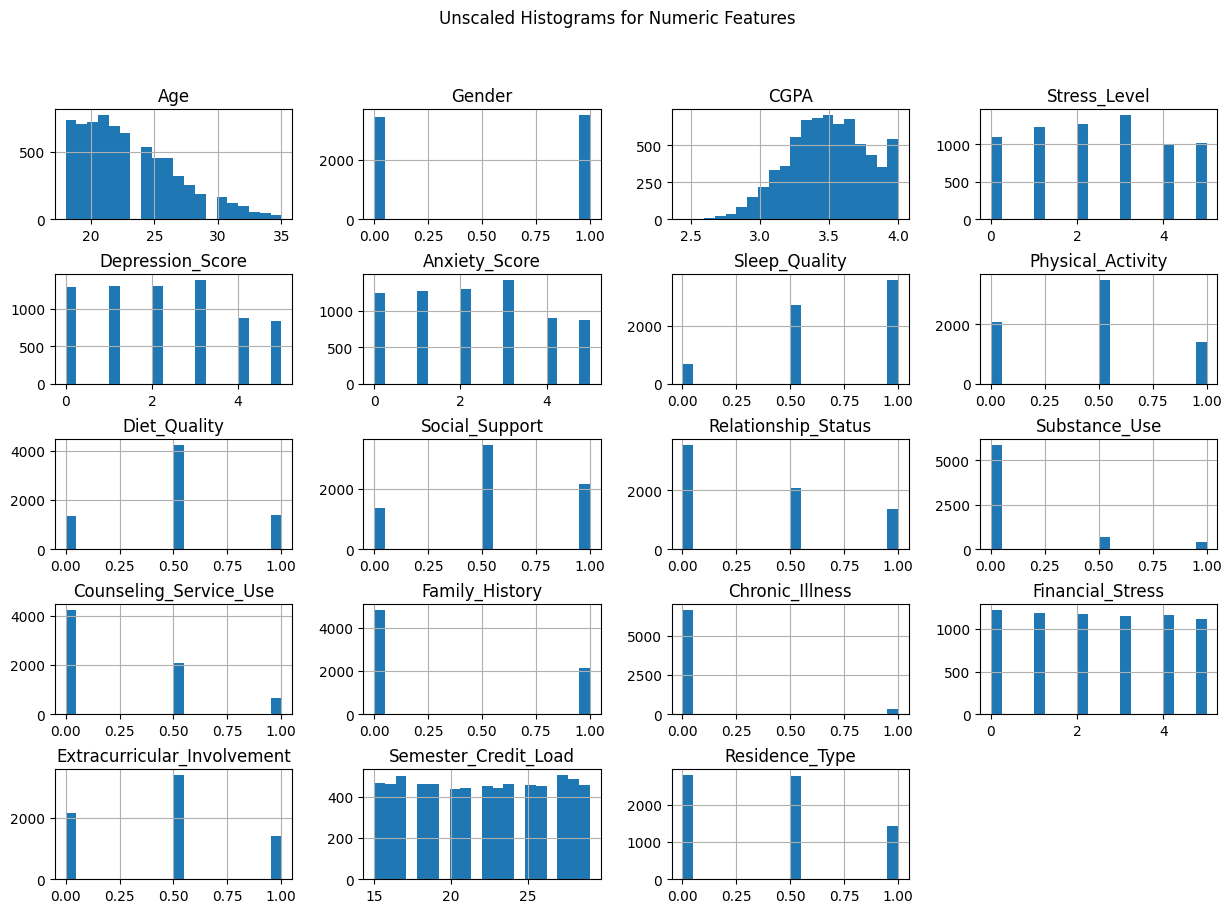

In [7]:
all_numeric_cols =['Age', 'Gender', 'CGPA', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 'Social_Support', 'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use', 'Family_History', 'Chronic_Illness', 'Financial_Stress', 'Extracurricular_Involvement', 'Semester_Credit_Load', 'Residence_Type']

df[all_numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Unscaled Histograms for Numeric Features')
plt.subplots_adjust(hspace=0.5)
plt.show()

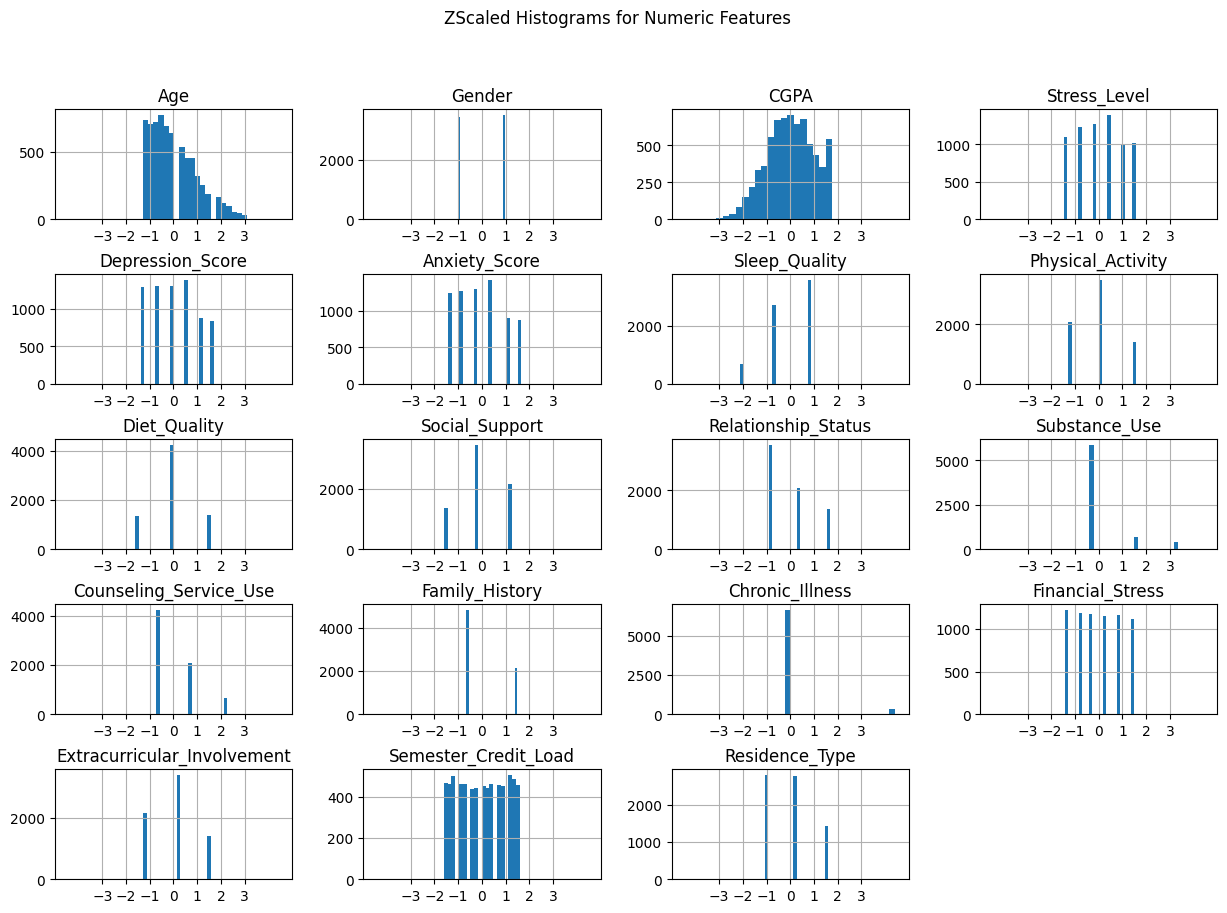

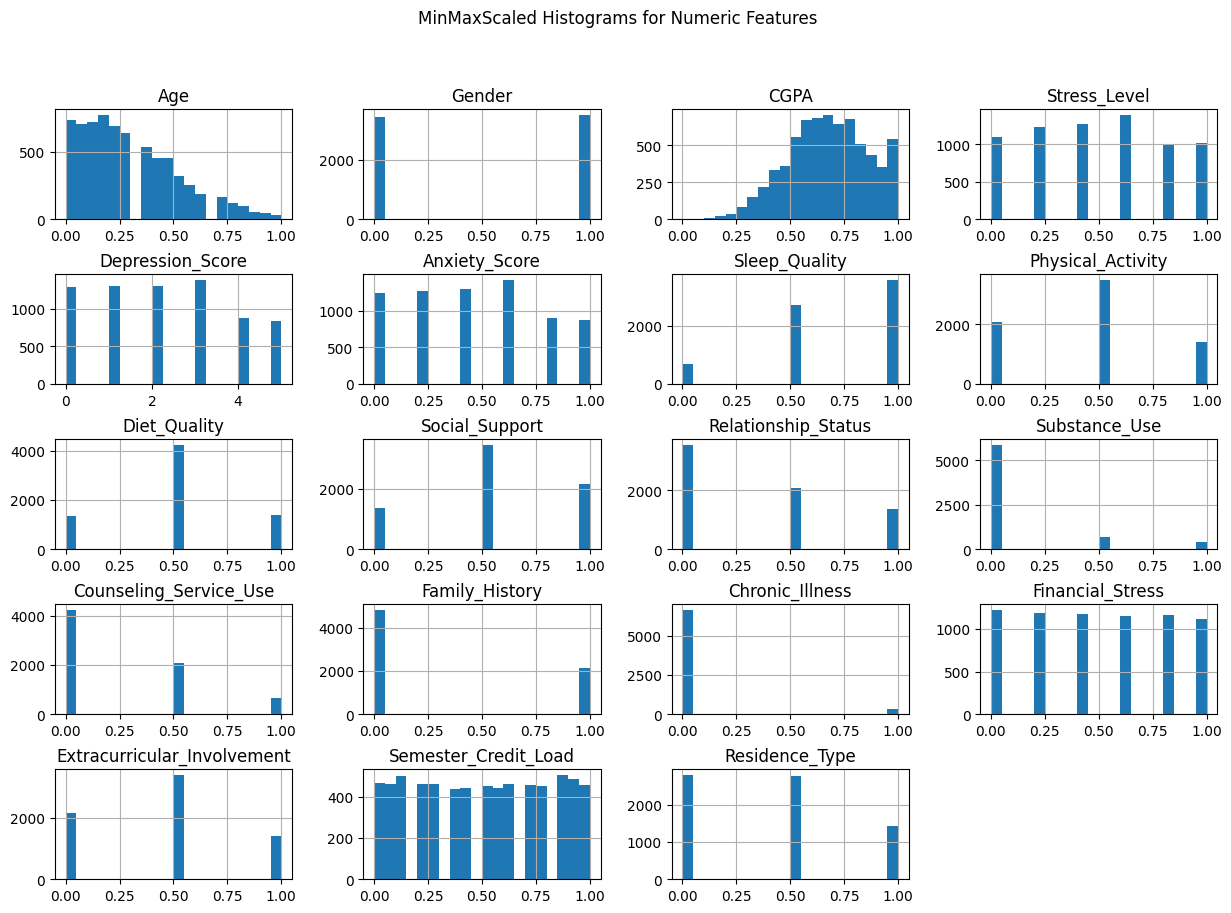

In [12]:
""" Scaling: Z-scale and MinMax"""
Zscaler = StandardScaler()
df_Zscaled = df.copy()
df_Zscaled[all_numeric_cols] = Zscaler.fit_transform(df[all_numeric_cols])
# plotting
axes = df_Zscaled.hist(bins=20, figsize=(15, 10))
for ax in axes.flatten():
    ax.set_xlim([-5, 5])
    ax.set_xticks(np.arange(-3, 4, 1))
plt.suptitle('ZScaled Histograms for Numeric Features')
plt.subplots_adjust(hspace=0.5)
plt.show()


cols_not_minmax_scaled =['Age',  'CGPA', 'Stress_Level', 'Anxiety_Score', 'Financial_Stress', 'Semester_Credit_Load']
minMaxScaler = MinMaxScaler()
df_MinMaxScaled= df.copy()
df_MinMaxScaled[cols_not_minmax_scaled] = minMaxScaler.fit_transform(df[cols_not_minmax_scaled])
# plotting
df_MinMaxScaled.hist(bins=20, figsize=(15, 10))
plt.suptitle('MinMaxScaled Histograms for Numeric Features')
plt.subplots_adjust(hspace=0.5)
plt.show()

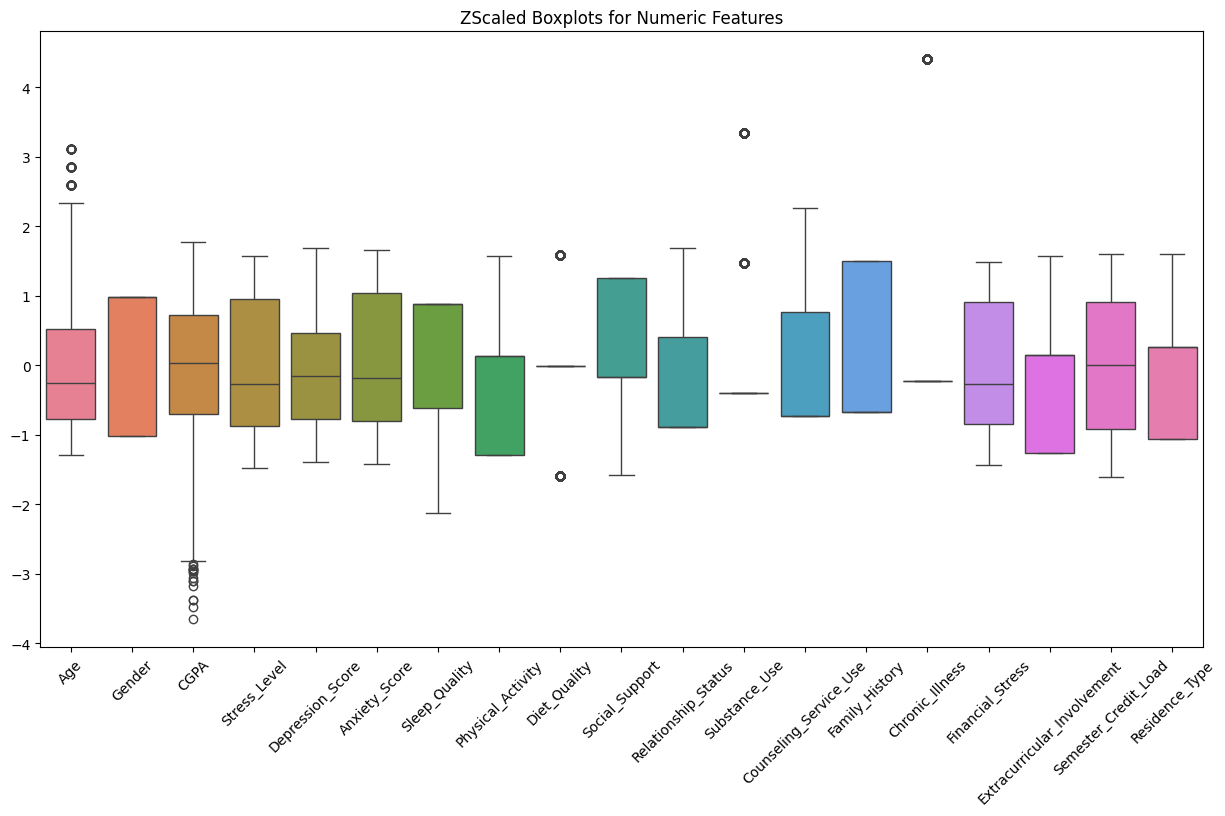

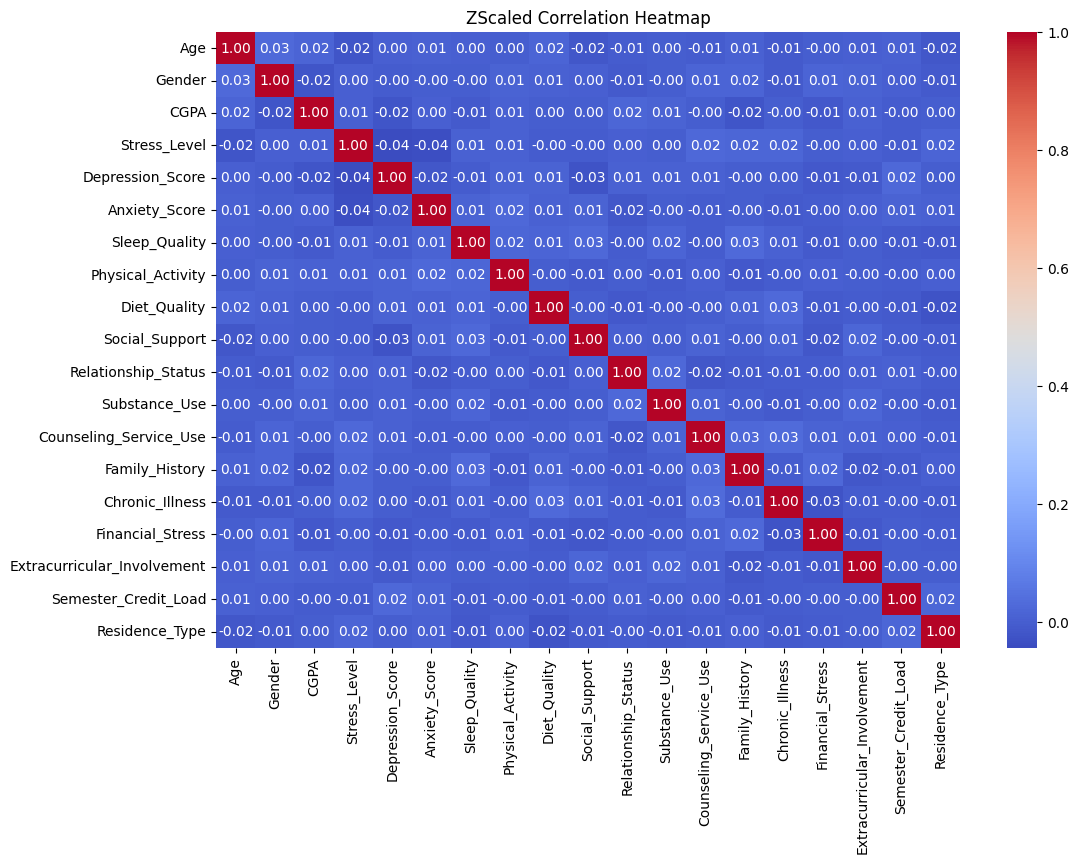

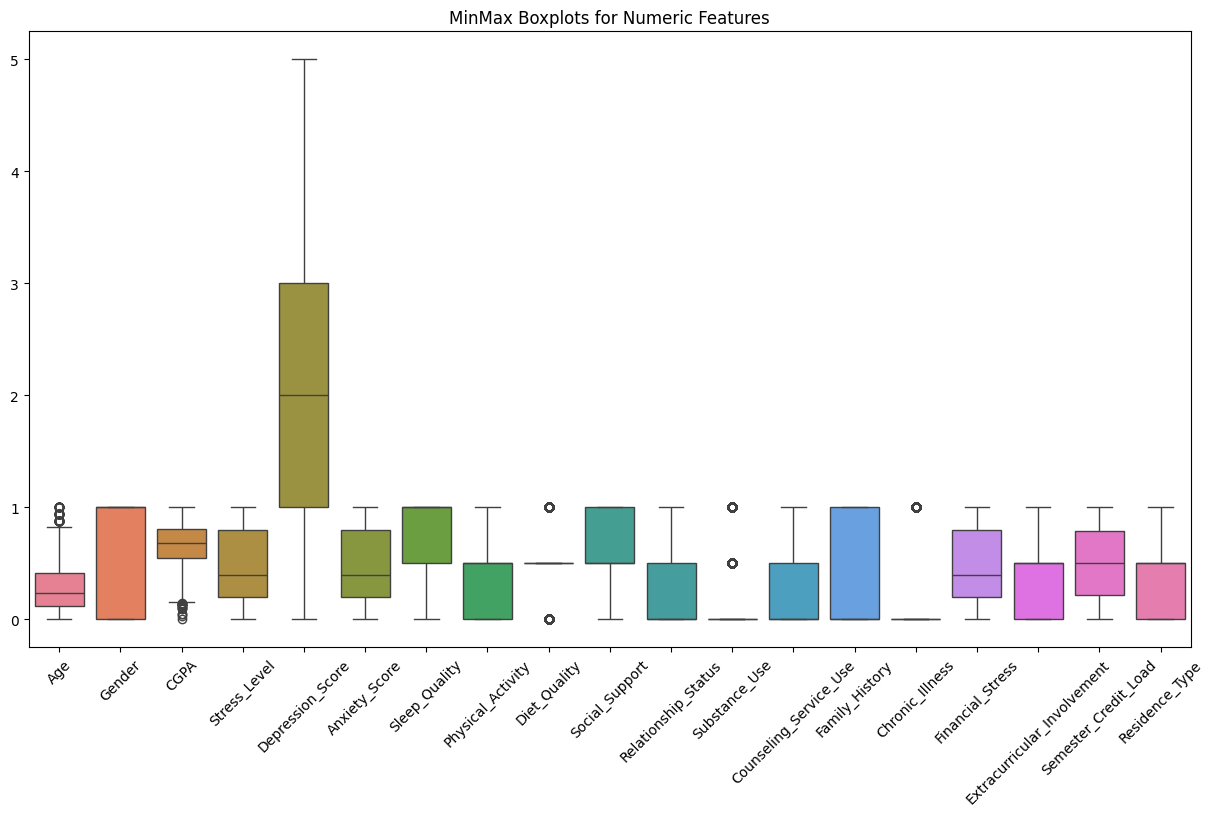

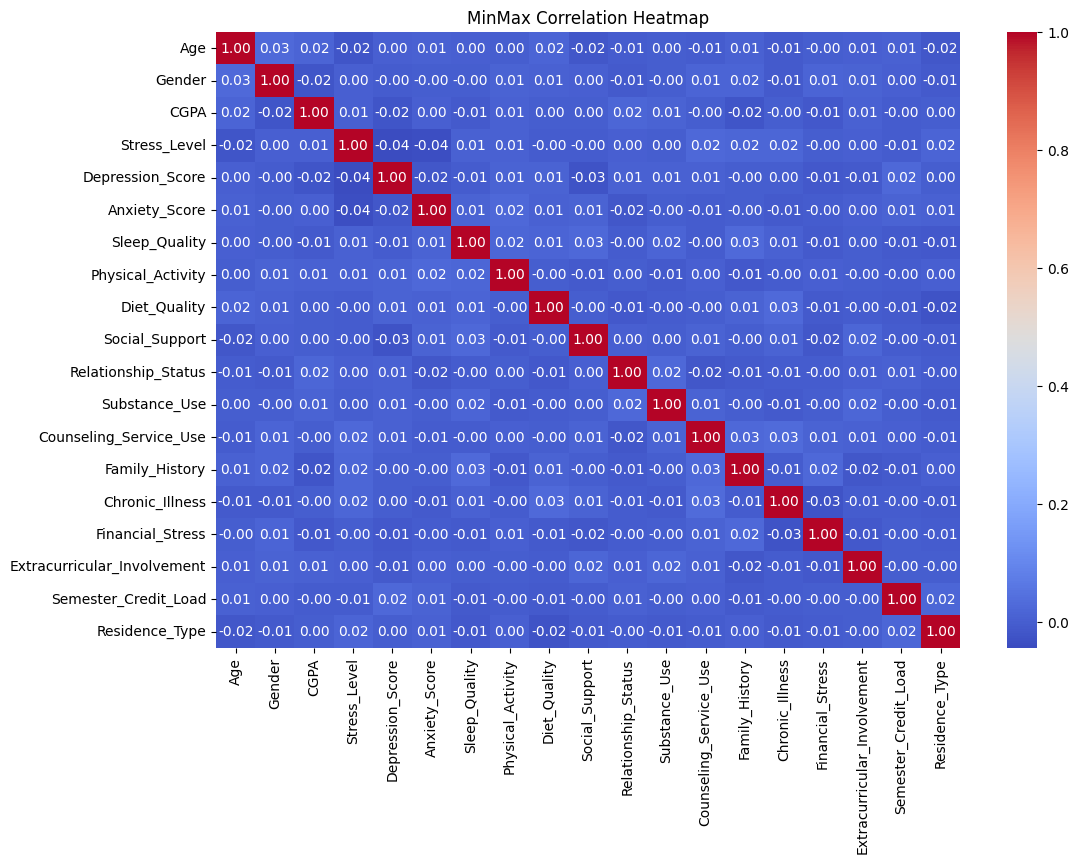

In [17]:
""" Box Plots """
# Z_Scaled
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_Zscaled[all_numeric_cols])
plt.title('ZScaled Boxplots for Numeric Features')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = df_Zscaled[all_numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('ZScaled Correlation Heatmap')
plt.show()

# MinMax
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_MinMaxScaled[all_numeric_cols])
plt.title('MinMax Boxplots for Numeric Features')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = df_MinMaxScaled[all_numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('MinMax Correlation Heatmap')
plt.show()


# Outlier Detection and Handling

In [18]:
def calculate_outliers(df, column_name, remove=False):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    
    if(remove):
        return len(outliers), df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return len(outliers), df

In [ ]:
# num_CGPA_outliers, df_outlier_removed = calculate_outliers(df_Zscaled, 'CGPA', True)
# plt.figure(figsize=(15, 8))
# sns.boxplot(data=df_Zscaled_outlier_removed[all_cols])
# plt.title('ZScaled Boxplots for Numeric Features')
# plt.xticks(rotation=45)
# plt.show()

In [23]:
# num_Age_outliers, df_outliers_removed = calculate_outliers(df_outlier_removed,'Age', True)
# plt.figure(figsize=(15, 8))
# sns.boxplot(data=df_Zscaled_outlier_removed[all_cols])
# plt.title('ZScaled Boxplots for Numeric Features')
# plt.xticks(rotation=45)
# plt.show()

# Feature selection with t-SNE

In [3]:
X_norm = df.drop(['Depression_Score'], axis=1)
y = df['Depression_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, random_state=13, test_size=0.25, shuffle=True
)

In [5]:
def split_df(df):
    X = df.drop(['Depression_Score', 'Course'], axis=1)
    y = df['Depression_Score']

    return train_test_split(X, y, random_state=13, test_size=0.2, shuffle=True)

def find_optimal_perplexity_sklearn(df, plot_title, **kwargs):
    X_train, X_test, y_train, y_test = split_df(df)
    perplexity = np.arange(5, 55, 5)
    divergence = []

    for i in perplexity:
        print('starting tsne w perplexity ', i, '...')
        # model = TSNE(n_components=3, perplexity=i)
        model = TSNE(n_jobs=20, *kwargs)
        reduced = model.fit_transform(X_train)
        divergence.append(model.kl_divergence_)
    
    plt.plot(perplexity, divergence)
    plt.title(plot_title)
    plt.xlabel('Perplexity')
    plt.ylabel('Divergence')
    
        
def find_optimal_perplexity_opentsne(df, plot_title, **kwargs):
    X_train, X_test, y_train, y_test = split_df(df)
    perplexity = np.arange(5, 55, 5)
    divergence = []

    for i in perplexity:
        print('starting tsne w perplexity ', i, '...')
        # model = TSNE(n_components=3, perplexity=i)
        model = TSNE(n_jobs=20, *kwargs)
        reduced = model.fit_transform(X_train)
        divergence.append(model.kl_divergence_)

    plt.plot(perplexity, divergence)
    plt.title(plot_title)
    plt.xlabel('Perplexity')
    plt.ylabel('Divergence')


## running tSNE with optimal perplexity

In [46]:
tsne = TSNE(n_components=3, perplexity=5, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

tsne.kl_divergence_

2.2340104579925537

In [49]:
import plotly.express as px

fig = px.scatter_3d(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], z=X_train_tsne[:, 2], color=y_train, opacity=0.8)
fig.update_layout(
    title="t-SNE visualization of the dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
from openTSNE import TSNE
import numpy as np

open_tsne = TSNE(n_components=6, random_state=42) 

